# End to End multi-class Dog breed classification
### the data set being used is:
https://www.kaggle.com/competitions/dog-breed-identification/data

In [2]:
# unzip the data set
# !unzip "drive/MyDrive/dog-breed-images/archive.zip" -d "drive/MyDrive/dog_vision"

# Get the workspace ready

In [3]:
# --import tensorflow into colab--
import tensorflow as tf
import tensorflow_hub as hub

In [4]:
print("tensorflow version:", tf.__version__)
print("tensorflow hub version:", hub.__version__)
print("gpu is", "avalible" if tf.config.list_physical_devices("GPU") else "not avalible")

tensorflow version: 2.18.0
tensorflow hub version: 0.16.1
gpu is avalible


## Getting the data ready (turning into tensor)

In [5]:
import pandas as pd
labels_csv = pd.read_csv("drive/MyDrive/dog_vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     fff43b07992508bc822f33d8ffd902ae  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


<Axes: xlabel='breed'>

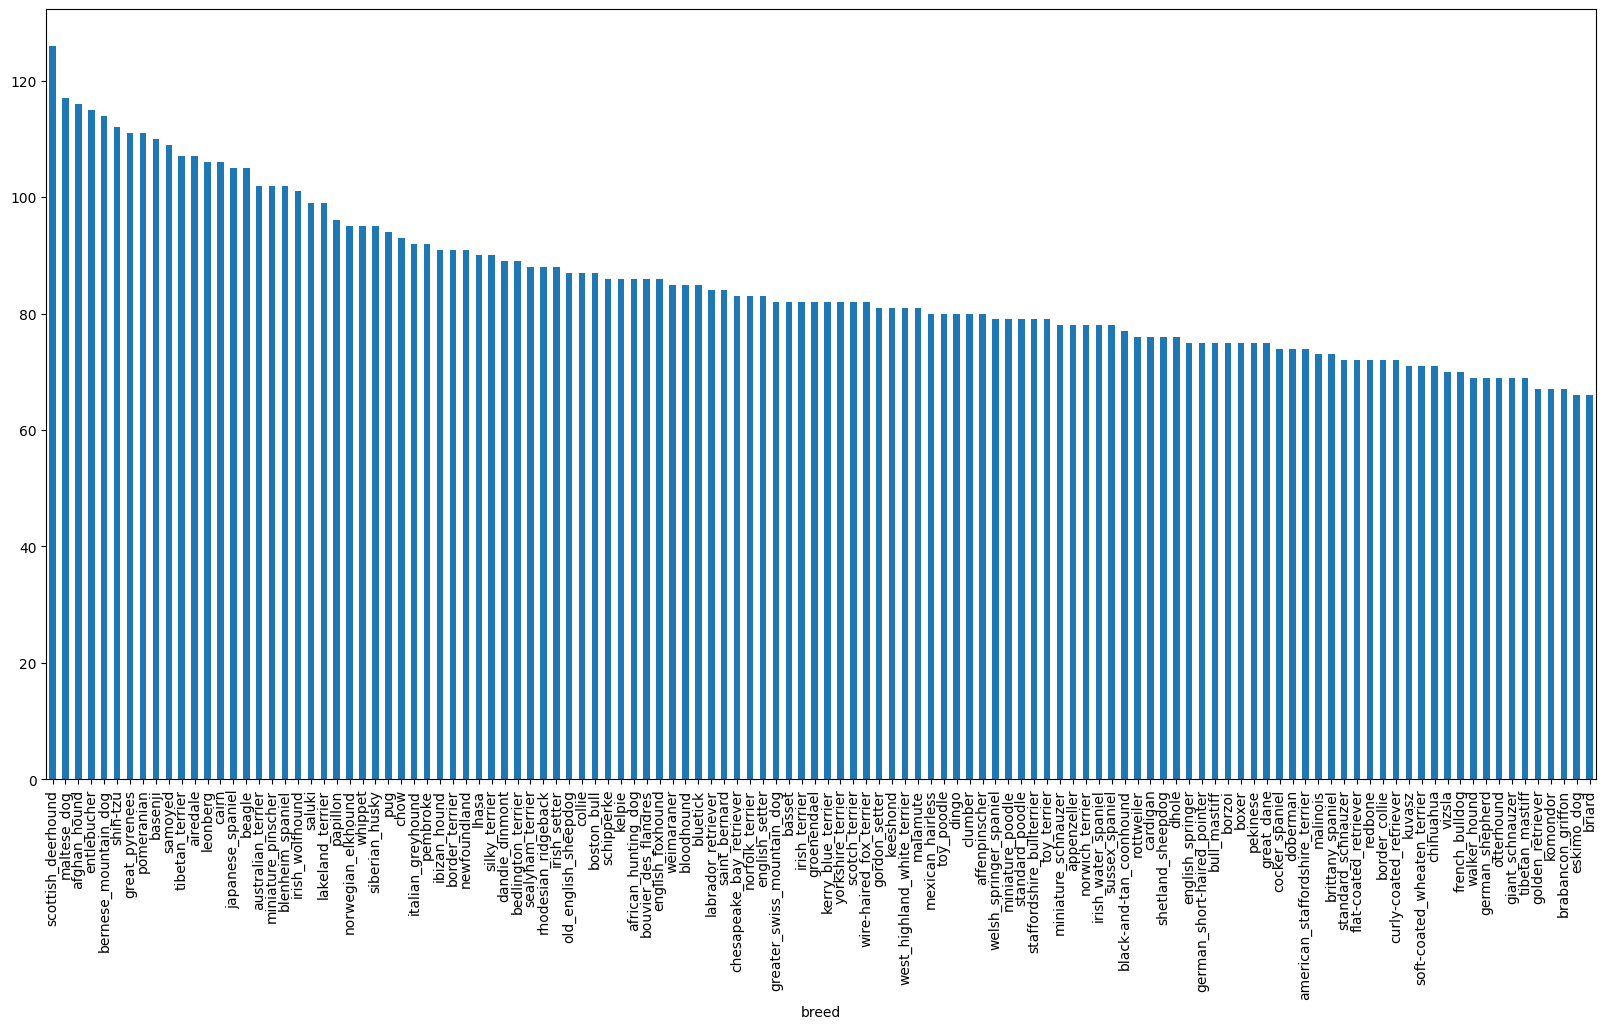

In [6]:
# How many images are there of each breed?
labels_csv['breed'].value_counts().plot.bar(figsize=(20, 10))

In [7]:
labels_csv['breed'].value_counts().median()

82.0

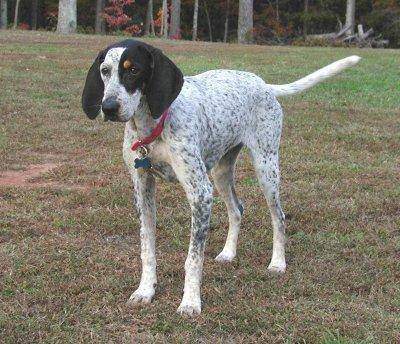

In [8]:
from IPython.display import Image
Image('drive/MyDrive/dog_vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg')

### Getting images and their labels

In [9]:
filenames = [f"drive/MyDrive/dog_vision/train/{fname}.jpg" for fname in labels_csv["id"]]
len(filenames)

10222

In [10]:
# check whether number of filenames matches number of actual image files
import os
if len(os.listdir('drive/MyDrive/dog_vision/train/')) == len(filenames):
  print('your data is match with data source ✅')
else:
  print('your data is not match with data source check out and find the problem ❌')

your data is match with data source ✅


In [15]:
os.listdir('drive/MyDrive/dog_vision')

['labels.csv', 'sample_submission.csv', 'test', 'train']

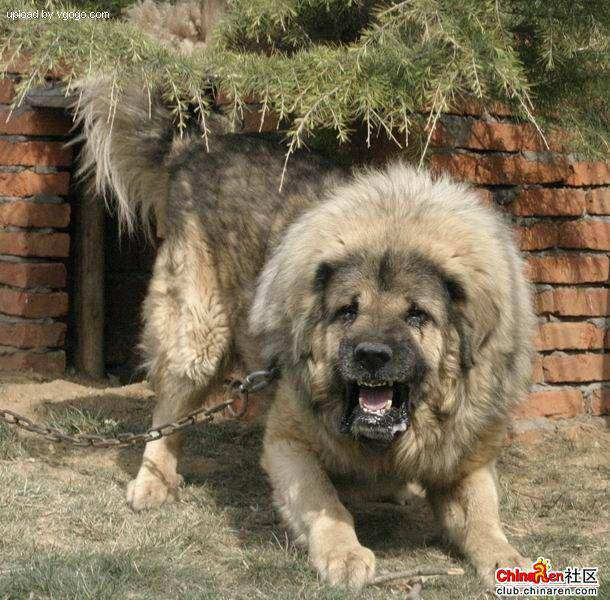

In [18]:
Image(filenames[9000])

In [20]:
labels_csv['breed'][9000]

'tibetan_mastiff'

In [21]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
